In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import chi2_contingency

In [2]:
columns = [] # имена раскрывают данные

In [7]:
data = pd.read_excel('Данные Анкет.xlsx', usecols="B:BH", skiprows=2, nrows=376)

Небольшая предобработка и предварительный анализ

In [10]:
data_phys = data[['phys_before', 'phys_middle', 'phys_end']].dropna()
data_phys = data_phys.loc[data_phys['phys_end']!='некий текст ']
data_phys = data_phys.astype({'phys_end': float})

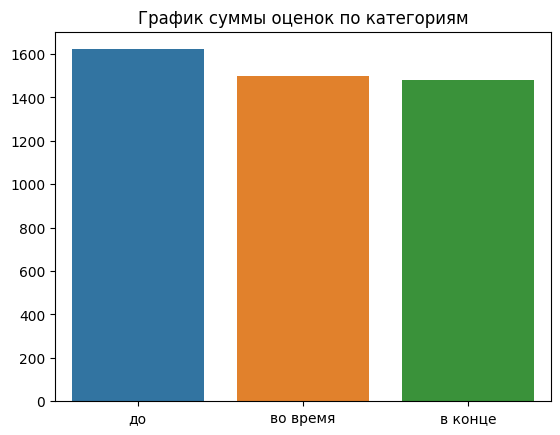

In [11]:
(sns.barplot(x=['до', 'во время', 'в конце'], 
            y=[data_phys['phys_before'].sum(), data_phys['phys_middle'].sum(), data_phys['phys_end'].sum()])
            .set_title('График суммы оценок по категориям'))
plt.show()

Сбор данных в удобный для аналлиза формат

In [12]:
data_group = pd.concat([data_phys.groupby('phys_before')['phys_before'].count(), data_phys.groupby('phys_middle')['phys_middle'].count(),
                       data_phys.groupby('phys_end')['phys_end'].count()], axis=1)
data_group

,phys_before,phys_middle,phys_end
1.0,2,4,5
2.0,1,7,14
3.0,18,58,57
4.0,101,117,114
5.0,232,168,164


Визуальное построение графика с сохранением картинки для вставки в описание результата

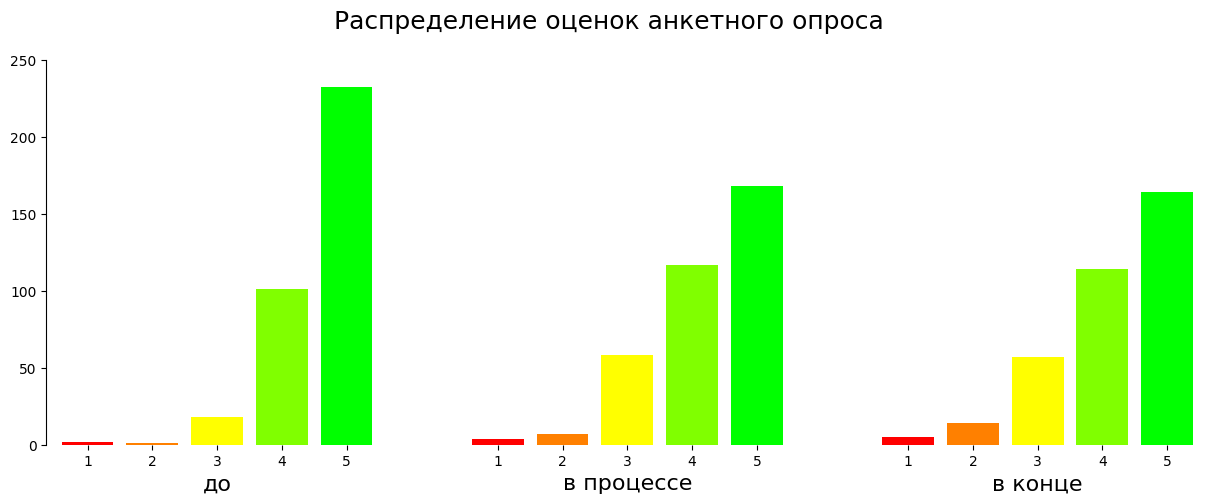

In [97]:
colors = ['#FF0000', '#FF8000','#FFFF00','#80FF00','#00FF00']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Распределение оценок анкетного опроса', size=18)
ax1.bar(data=data_group, x=data_group.index, height='phys_before', color=colors)
ax2.bar(data=data_group, x=data_group.index, height='phys_middle', color=colors)
ax3.bar(data=data_group, x=data_group.index, height='phys_end', color=colors)
ax1.set_xlabel('до', fontsize=16)
ax2.set_xlabel('в процессе', fontsize=16)
ax3.set_xlabel('в конце', fontsize=16)
ax1.set_ylim([0, 250])
ax2.set_ylim([0, 250])
ax3.set_ylim([0, 250])
ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(True)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)

plt.savefig('dist.png')
plt.show()

In [74]:
data_group_ru = data_group.copy()
data_group_ru.columns = ['до', 'в процессе', 'в конце']
data_group_ru

,до,в процессе,в конце
1.0,2,4,5
2.0,1,7,14
3.0,18,58,57
4.0,101,117,114
5.0,232,168,164


Расчет статистического критерия МакНемара

In [14]:
mcnemar(np.array([data_group['phys_before'], data_group['phys_middle']])).pvalue

0.375

In [15]:
mcnemar(np.array([data_group['phys_middle'], data_group['phys_end']])).pvalue

0.7744140625

In [16]:
mcnemar(np.array([data_group['phys_before'], data_group['phys_end']])).pvalue

0.21875

Вывод: нулевая гипотеза об отсутствии разницы между распределениями в группах не может быть отклонена даже при отсутствии корректрировки на парность сравнений

Расчет статистического критерия хи-квадрат (по просьбе заказчика)

In [17]:
chi2_contingency(np.array([data_group['phys_before'], data_group['phys_middle']])).pvalue

1.3335184286362653e-07

Если бы критерий был применим для данного исследования, то было бы вожможно отклонить нулевую гипотезу с учетом установленного уровня значимости ($\alpha$=0.05), однако он применим при выполнении требования о независимости групп, что не соответствует данному исследованию (одни объекты в разных условиях изучения).